# Krzysztof Tomala - Explainable AI - Homework 5

# Report

# List of features with short descriptions

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels visible in fluoroscopy (0-3)

cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

thal : Thalium Stress Test result
    
slope : the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

oldpeak : ST depression induced by exercise relative to rest

# Tasks

    Calculate Permutation-based Variable Importance for the selected model.

![image](forest.png)

We can see that the most importatnt variables for the random tree classifier, based on Permutation-based Variable Importance, are ca, cp_0 and thalach. 

    Train three more candidate models (different variable transformations, different model architectures, hyperparameters) and compare their rankings of important features using PVI. What are the differences? Why?

![image](forest_hp2.png)

![image](xgb.png)

![image](xgb_hp2.png)

We can see that the numerical results vary a bit, but order of the variables is pretty similar ( for example ca and cp_0 are always in top 4). 
The difference might come from small differences in the models or just from randomness of the method.

    For the tree-based model from (1), compare PVI with:
    A) the traditional feature importance measures for trees: Gini impurity etc.; what is implemented in a given library: see e.g. the feature_importances_ attribute in xgboost and sklearn.
    B) [in Python] SHAP variable importance based on the TreeSHAP algorithm available in the shap package.


![image](feature_importance.png)

![image](shap.png)

We can see that this methods give similiar results to the ones before. I think it is happening because we use all of them to find which variables have more and less impact on the predictions of the model, so it would be very bad if deifferent methods gave us different results.

# Appendix

In [1]:
import pandas as pd
import sklearn
from sklearn import ensemble
import dalex as dx
import lime

In [2]:
dataset = pd.read_csv('heart.csv')
dataset = pd.get_dummies(dataset)
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
features = dataset.drop(columns='output')

#fixing typo in data
features['thalach']=features['thalachh']
features = features.drop(columns='thalachh')

features['slope']=features['slp']
features = features.drop(columns='slp')

features['ca']=features['caa']
features = features.drop(columns='caa')

features = pd.get_dummies(features, columns=['cp', 'thall'])

features
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, dataset['output'], test_size=0.3, random_state=0)
X_train

,age,sex,trtbps,chol,fbs,restecg,exng,oldpeak,thalach,slope,ca,cp_0,cp_1,cp_2,cp_3,thall_0,thall_1,thall_2,thall_3
137,62,1,128,208,1,0,0,0.0,140,2,0,0,1,0,0,0,0,1,0
106,69,1,160,234,1,0,0,0.1,131,1,1,0,0,0,1,0,0,1,0
284,61,1,140,207,0,0,1,1.9,138,2,1,1,0,0,0,0,0,0,1
44,39,1,140,321,0,0,0,0.0,182,2,0,0,0,1,0,0,0,1,0
139,64,1,128,263,0,1,1,0.2,105,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,132,247,1,0,1,0.1,143,1,4,1,0,0,0,0,0,0,1
192,54,1,120,188,0,1,0,1.4,113,1,1,1,0,0,0,0,0,0,1
117,56,1,120,193,0,0,0,1.9,162,1,0,0,0,0,1,0,0,0,1
47,47,1,138,257,0,0,0,0.0,156,2,0,0,0,1,0,0,0,1,0


In [4]:
forest = sklearn.ensemble.RandomForestClassifier()
forest.fit(X=X_train,y=y_train)
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,forest.predict(X_test))}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,forest.predict(X_test))}')

forest_accuracy = sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))
forest_recall = sklearn.metrics.recall_score(y_test,forest.predict(X_test))
forest_precision = sklearn.metrics.precision_score(y_test,forest.predict(X_test))

print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,forest.predict(X_train))}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,forest.predict(X_train))}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,forest.predict(X_train))}')

Accuracy: 0.8351648351648352
Recall: 0.8723404255319149
Precision: 0.82

Results on train dataset:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [5]:
obs = list(range(2))
import numpy as np
predict = lambda m, d: m.predict_proba(d)[:,1]

for i in obs:
    obs1 = X_test.iloc[obs[i]].to_numpy().reshape(1,-1)
    print(obs1)
    print(predict(forest, obs1))
    

X = X_test
y = y_test
explainer = dx.Explainer(forest, X_test, y_test, predict_function=predict, label="forest")

[[ 70.    1.  145.  174.    0.    1.    1.    2.6 125.    0.    0.    1.
    0.    0.    0.    0.    0.    0.    1. ]]
[0.15]
[[ 64.    1.  170.  227.    0.    0.    0.    0.6 155.    1.    0.    0.
    0.    0.    1.    0.    0.    0.    1. ]]
[0.66]
Preparation of a new explainer is initiated

  -> data              : 91 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 91 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : forest
  -> predict function  : <function <lambda> at 0x7ff4a921f280> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.548, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.86, mean = -0.0311, max = 0.86
  -> model_info        

/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
pvi = explainer.model_parts(random_state=0)
pvi.plot()

In [9]:
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=17, criterion='entropy', max_features='log2')
forest.fit(X=X_train,y=y_train)
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))}')
print(f'Recall: {sklearn.metrics.recall_score(y_test,forest.predict(X_test))}')
print(f'Precision: {sklearn.metrics.precision_score(y_test,forest.predict(X_test))}')

forest_accuracy = sklearn.metrics.accuracy_score(y_test,forest.predict(X_test))
forest_recall = sklearn.metrics.recall_score(y_test,forest.predict(X_test))
forest_precision = sklearn.metrics.precision_score(y_test,forest.predict(X_test))

print('\nResults on train dataset:')
print(f'Accuracy: {sklearn.metrics.accuracy_score(y_train,forest.predict(X_train))}')
print(f'Recall: {sklearn.metrics.recall_score(y_train,forest.predict(X_train))}')
print(f'Precision: {sklearn.metrics.precision_score(y_train,forest.predict(X_train))}')

obs = list(range(2))
import numpy as np
predict = lambda m, d: m.predict_proba(d)[:,1]

for i in obs:
    obs1 = X_test.iloc[obs[i]].to_numpy().reshape(1,-1)
    print(obs1)
    print(predict(forest, obs1))
    

X = X_test
y = y_test
explainer = dx.Explainer(forest, X_test, y_test, predict_function=predict, label="forest_hp2")

pvi = explainer.model_parts(random_state=0)
pvi.plot()

Accuracy: 0.8131868131868132
Recall: 0.8297872340425532
Precision: 0.8125

Results on train dataset:
Accuracy: 0.9952830188679245
Recall: 1.0
Precision: 0.9915966386554622
[[ 70.    1.  145.  174.    0.    1.    1.    2.6 125.    0.    0.    1.
    0.    0.    0.    0.    0.    0.    1. ]]
[0.17647059]
[[ 64.    1.  170.  227.    0.    0.    0.    0.6 155.    1.    0.    0.
    0.    0.    1.    0.    0.    0.    1. ]]
[0.58823529]
Preparation of a new explainer is initiated

  -> data              : 91 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 91 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : forest_hp2
  -> predict function  : <function <lambda> at 0x7ff4a8cc5ee0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.54, max = 1.0
  -> model type        : class

/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/krzysztof/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [10]:
import xgboost
model = xgboost.XGBClassifier(
    n_estimators=50, 
    max_depth=2, 
    use_label_encoder=False, 
    eval_metric="logloss",
    
    enable_categorical=True,
    tree_method="hist"
)

model.fit(X_train, y_train)

def pf_xgboost_classifier_categorical(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict_proba(df)[:, 1]

explainer = dx.Explainer(model, X_test, y_test, predict_function=pf_xgboost_classifier_categorical, label="xgb")

pvi = explainer.model_parts(random_state=0)
pvi.plot()

/home/krzysztof/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Preparation of a new explainer is initiated

  -> data              : 91 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 91 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : xgb
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7ff4a8cbb550> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00192, mean = 0.547, max = 0.998
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.965, mean = -0.0305, max = 0.967
  -> model_info        : package xgboost

A new explainer has been created!


In [11]:
model = xgboost.XGBClassifier(
    n_estimators=33, 
    max_depth=5, 
    use_label_encoder=False, 
    eval_metric="logloss",
    enable_categorical=True,
    tree_method="approx",
    learning_rate=0.01,
)

model.fit(X_train, y_train)

def pf_xgboost_classifier_categorical(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict_proba(df)[:, 1]

explainer = dx.Explainer(model, X_test, y_test, predict_function=pf_xgboost_classifier_categorical,  label="xgb_hp2")

pvi = explainer.model_parts(random_state=0)
pvi.plot()

/home/krzysztof/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Preparation of a new explainer is initiated

  -> data              : 91 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 91 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : xgb_hp2
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7ff4a81d31f0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.372, mean = 0.515, max = 0.63
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.623, mean = 0.00179, max = 0.622
  -> model_info        : package xgboost

A new explainer has been created!


       name  importance
0   oldpeak    0.113075
1   thall_2    0.110323
2   thalach    0.104715
3      cp_0    0.099254
4        ca    0.090715
5   thall_3    0.085259
6      chol    0.081664
7       age    0.072114
8    trtbps    0.061529
9      exng    0.047232
10      sex    0.033155
11    slope    0.031441
12  restecg    0.015431
13     cp_2    0.012766
14     cp_1    0.010712
15     cp_3    0.010178
16  thall_1    0.009610
17      fbs    0.008905
18  thall_0    0.001921


<AxesSubplot:xlabel='name'>

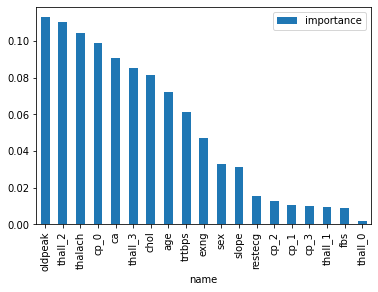

In [18]:
forest = sklearn.ensemble.RandomForestClassifier()
forest.fit(X=X_train,y=y_train)

order = np.flip(np.argsort(forest.feature_importances_))
a = {'name': forest.feature_names_in_[order], 'importance': forest.feature_importances_[order]}
aa = pd.DataFrame.from_dict(a)
print(aa)
aa.plot.bar(x='name')

In [20]:
import shap
shap_explainer = shap.explainers.Tree(forest, data=X, model_output="probability")
shap_values = shap_explainer(X)[:,:,1]
shap_values

.values =
array([[ 3.32526161e-02, -1.37495201e-02, -2.23837868e-02, ...,
         8.05861008e-05, -9.80385900e-02, -5.92786926e-02],
       [ 3.20251236e-03, -1.40779691e-02, -3.88957350e-02, ...,
         9.28571409e-04, -5.09415217e-02, -5.90239389e-02],
       [-2.93609357e-02, -1.91550231e-02, -2.35595238e-02, ...,
         8.57142854e-04, -3.40346675e-02, -4.27662218e-02],
       ...,
       [ 1.02163787e-02, -1.28686547e-02,  1.33263995e-02, ...,
         6.93354243e-04,  6.85799301e-02,  6.43745411e-02],
       [ 4.16021295e-03, -2.46435106e-02,  2.03827400e-02, ...,
         1.21978020e-03,  7.44906664e-02,  4.38923331e-02],
       [-1.47821814e-02, -2.29606223e-02,  1.24969911e-02, ...,
         8.39220310e-04,  7.03707471e-02,  3.17700155e-02]])

.base_values =
array([0.55087912, 0.55087912, 0.55087912, 0.55087912, 0.55087912,
       0.55087912, 0.55087912, 0.55087912, 0.55087912, 0.55087912,
       0.55087912, 0.55087912, 0.55087912, 0.55087912, 0.55087912,
       0.5508791

<AxesSubplot:xlabel='name'>

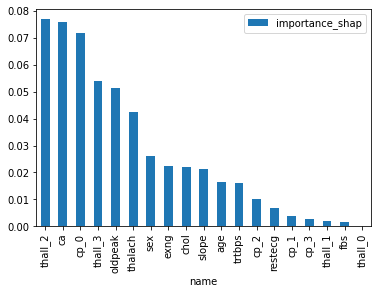

In [22]:
rf_resultX = pd.DataFrame(shap_values.values, columns = forest.feature_names_in_)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(forest.feature_names_in_, vals)),
                                  columns=['name','importance_shap'])
shap_importance.sort_values(by=['importance_shap'],
                               ascending=False, inplace=True)
shap_importance.plot.bar(x='name')